In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 593


In [6]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}appid={weather_api_key}&units={units}&q={city}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | qaqortoq
Processing Record 2 of Set 1 | luderitz
Processing Record 3 of Set 1 | blackmans bay
Processing Record 4 of Set 1 | puerto natales
Processing Record 5 of Set 1 | avarua
Processing Record 6 of Set 1 | waitangi
Processing Record 7 of Set 1 | pionerskiy
Processing Record 8 of Set 1 | vorgashor
Processing Record 9 of Set 1 | naze
Processing Record 10 of Set 1 | hawaiian paradise park
Processing Record 11 of Set 1 | post
Processing Record 12 of Set 1 | pisco
Processing Record 13 of Set 1 | bethel
Processing Record 14 of Set 1 | argo
Processing Record 15 of Set 1 | puerto ayora
Processing Record 16 of Set 1 | kupang
Processing Record 17 of Set 1 | kaa-khem
Processing Record 18 of Set 1 | mahina
Processing Record 19 of Set 1 | tabou
Processing Record 20 of Set 1 | tiksi
Processing Record 21 of Set 1 | bellavista
Processing Record 22 of Set 1 | haiku-pauwela
Processing Record 23 of Set 1 | ancud

In [7]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          571
Lat           571
Lng           571
Max Temp      571
Humidity      571
Cloudiness    571
Wind Speed    571
Country       571
Date          571
dtype: int64

In [12]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,qaqortoq,60.7167,-46.0333,-21.04,68,2,4.03,GL,1707009871
1,luderitz,-26.6481,15.1594,18.17,98,34,1.16,NaN,1707009872
2,blackmans bay,-43.0167,147.3167,16.07,91,100,3.71,AU,1707009873
3,puerto natales,-51.7236,-72.4875,8.36,82,100,1.32,CL,1707009873
4,avarua,-21.2078,-159.7750,30.03,74,75,3.09,CK,1707009874


In [14]:
# Export the City_Data into a csv

import os
os.makedirs("output_data")

open("output_data/cities.csv", "w").close()

city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [15]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,qaqortoq,60.7167,-46.0333,-21.04,68,2,4.03,GL,1707009871
1,luderitz,-26.6481,15.1594,18.17,98,34,1.16,NaN,1707009872
2,blackmans bay,-43.0167,147.3167,16.07,91,100,3.71,AU,1707009873
3,puerto natales,-51.7236,-72.4875,8.36,82,100,1.32,CL,1707009873
4,avarua,-21.2078,-159.7750,30.03,74,75,3.09,CK,1707009874


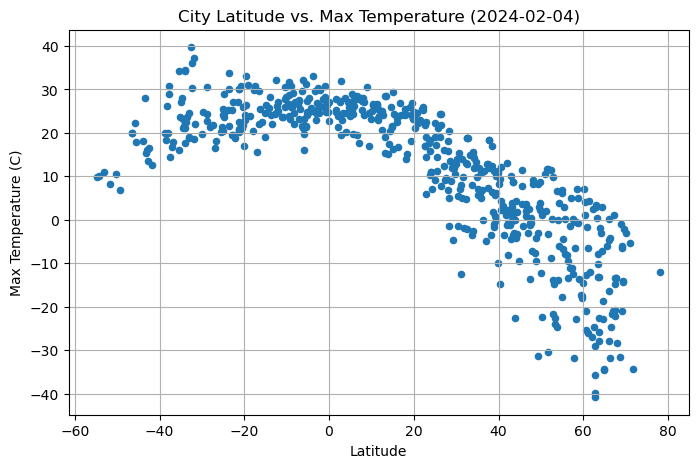

In [20]:
# Build scatter plot for latitude vs. temperature
city_data_df.plot(kind="scatter", x="Lat", y="Max Temp", grid=True, figsize=(8,5),
              title="City Latitude vs. Max Temperature (2024-02-04)")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

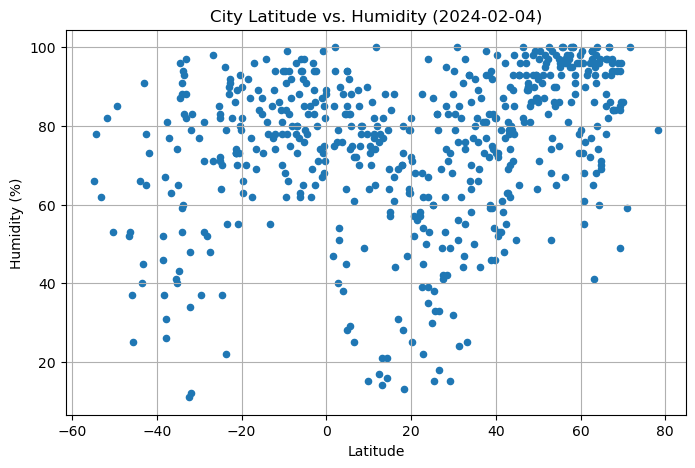

In [21]:
# Build the scatter plots for latitude vs. humidity

city_data_df.plot(kind="scatter", x="Lat", y="Humidity", grid=True, figsize=(8,5),
              title="City Latitude vs. Humidity (2024-02-04)")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

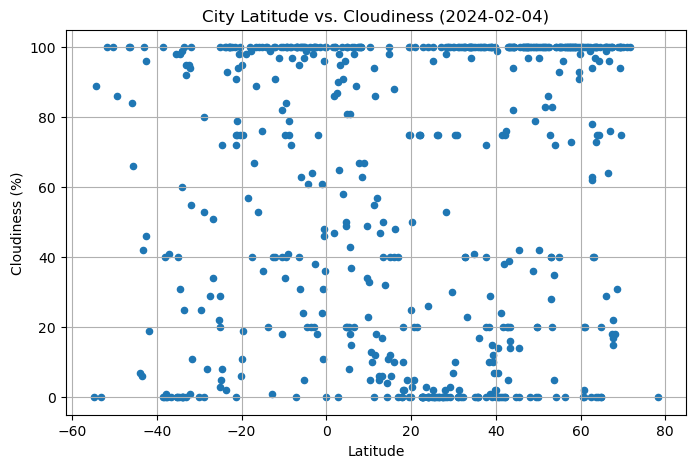

In [22]:
# Build the scatter plots for latitude vs. cloudiness
city_data_df.plot(kind="scatter", x="Lat", y="Cloudiness", grid=True, figsize=(8,5),
              title="City Latitude vs. Cloudiness (2024-02-04)")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

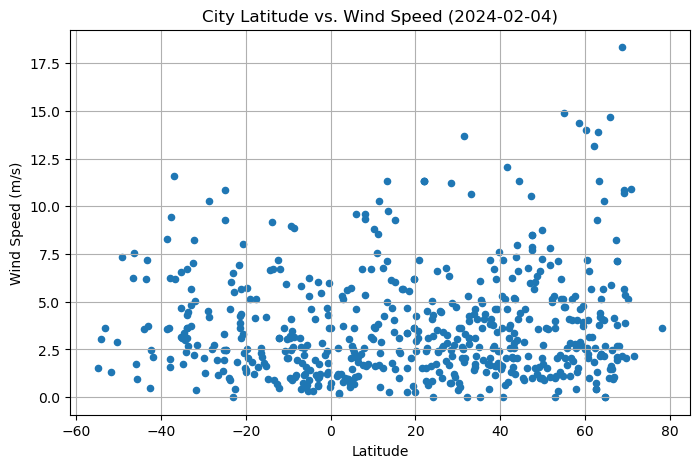

In [23]:
# Build the scatter plots for latitude vs. wind speed
city_data_df.plot(kind="scatter", x="Lat", y="Wind Speed", grid=True, figsize=(8,5),
              title="City Latitude vs. Wind Speed (2024-02-04)")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

In [143]:
# Define a function to create Linear Regression plots

#def create_linear_regression_plot(x, y):
    #plt.scatter(x, y)
    #slope, intercept, r_value, p_value, std_err = linregress(x, y)
    #predicted_values = slope * x + intercept
    #plt.plot(x, predicted_values, color='red')
    #print(f"The r-squared is: {rvalue**2}")
#plt.show()

In [144]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[(city_data_df['Lat']>=0)]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,qaqortoq,60.7167,-46.0333,-21.04,68,2,4.03,GL,1707009871
6,pionerskiy,54.9508,20.2275,6.19,86,100,14.86,RU,1707009875
7,vorgashor,67.5833,63.9500,-20.68,94,22,2.70,RU,1707009876
8,naze,28.3667,129.4833,20.51,74,98,2.48,JP,1707009877
9,hawaiian paradise park,19.5933,-154.9731,23.82,63,75,6.17,US,1707009877


In [145]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[(city_data_df['Lat']<0)]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,luderitz,-26.6481,15.1594,18.17,98,34,1.16,NaN,1707009872
2,blackmans bay,-43.0167,147.3167,16.07,91,100,3.71,AU,1707009873
3,puerto natales,-51.7236,-72.4875,8.36,82,100,1.32,CL,1707009873
4,avarua,-21.2078,-159.7750,30.03,74,75,3.09,CK,1707009874
5,waitangi,-43.9535,-176.5597,18.23,66,7,3.58,NZ,1707009874


The r-squared is: 0.7243633490300994


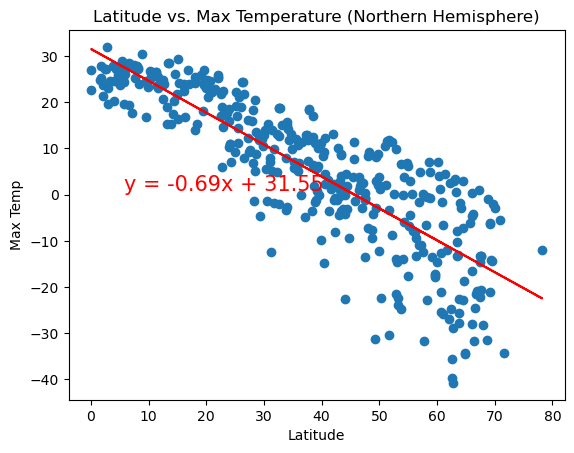

In [148]:
# Linear regression on Northern Hemisphere
x = northern_hemi_df['Lat']
y = northern_hemi_df['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x,y)
plt.plot(x,regress,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
print(f"The r-squared is: {rvalue**2}")
plt.title("Latitude vs. Max Temperature (Northern Hemisphere)")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.show()

**Discussion about the linear relationship:** In Northern Hemisphere,the Latitude is negatively correlated with the Max temperature; that is, the more latitude, the lower the temperature.

The r-value is: 0.21893875983904634


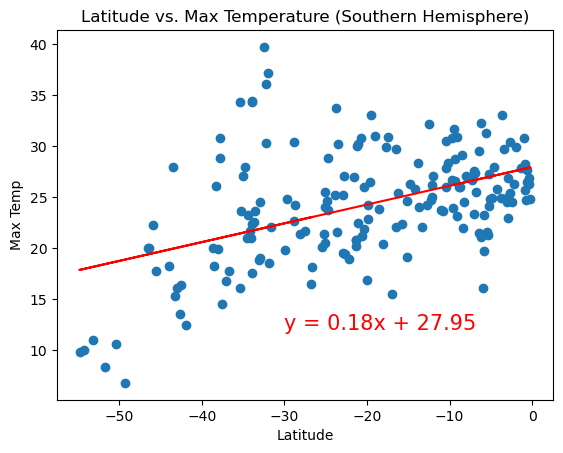

In [151]:
# Linear regression on Southern Hemisphere
x_sl = southern_hemi_df['Lat']
y_st = southern_hemi_df['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_sl, y_st)
regress_st = x_sl * slope + intercept
line_eq_sl = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_sl,y_st)
plt.plot(x_sl,regress_st,"r-")
plt.annotate(line_eq_sl, (-30,12),fontsize=15,color="red")
plt.title("Latitude vs. Max Temperature (Southern Hemisphere)")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
print(f"The r-value is: {rvalue**2}")
plt.show()

**Discussion about the linear relationship:** In Southern Hemisphere,the Latitude is positively correlated to the Max temperature; that is, the more latitude, the higher the temperature.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.17159062188174434


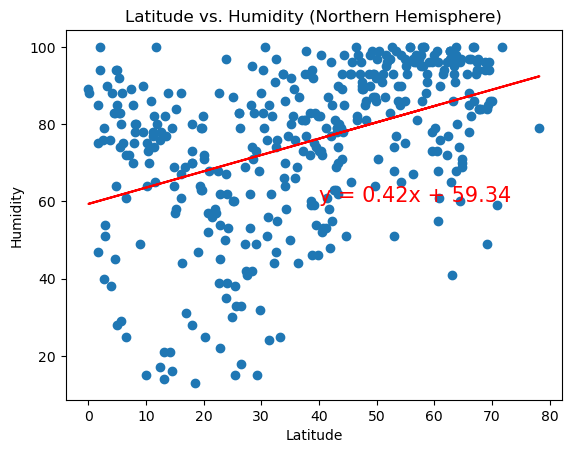

In [154]:
# Northern Hemisphere
y_nh = northern_hemi_df['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y_nh)
regress_nh = x * slope + intercept
line_eq_nh = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x,y_nh)
plt.plot(x,regress_nh,"r-")
plt.annotate(line_eq_nh, (40,60),fontsize=15,color="red")
plt.title("Latitude vs. Humidity (Northern Hemisphere)")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
print(f"The r-value is: {rvalue**2}")
plt.show()

**Discussion about the linear relationship:** In Northern Hemisphere,humidity is positively correlated to the latitude; that is, the more latitude, more humid.

The r-value is: 0.17788232950298585


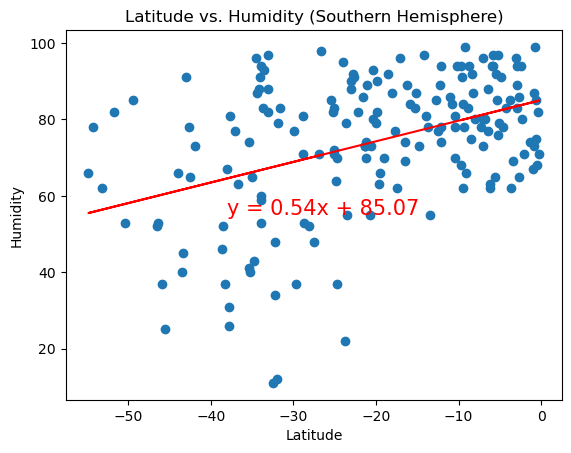

In [156]:
# Southern Hemisphere

y_sh = southern_hemi_df['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_sl, y_sh)
regress_sh = x_sl * slope + intercept
line_eq_sh = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_sl,y_sh)
plt.plot(x_sl,regress_sh,"r-")
plt.annotate(line_eq_sh, (-38,55),fontsize=15,color="red")
plt.title("Latitude vs. Humidity (Southern Hemisphere)")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
print(f"The r-value is: {rvalue**2}")
plt.show()

**Discussion about the linear relationship:** In Southern Hemisphere,humidity is also positively correlated to the latitude; that is, the more latitude, more humid. The correlation is larger in comparison with the northern hemisphere.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.052126350647938996


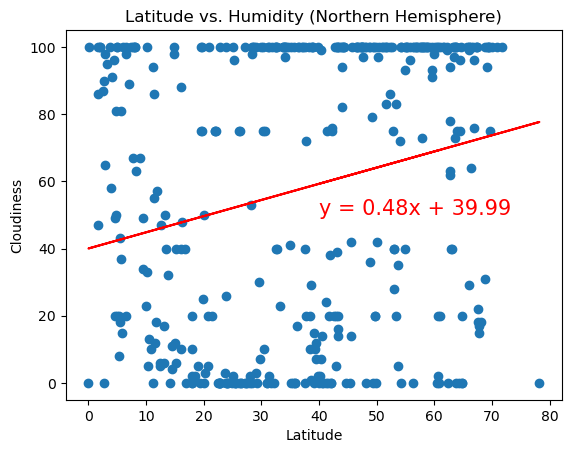

In [158]:
# Northern Hemisphere
y_nc = northern_hemi_df['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y_nc)
regress_nc = x * slope + intercept
line_eq_nc = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x,y_nc)
plt.plot(x,regress_nc,"r-")
plt.annotate(line_eq_nc, (40,50),fontsize=15,color="red")
plt.title("Latitude vs. Humidity (Northern Hemisphere)")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
print(f"The r-value is: {rvalue**2}")
plt.show()

**Discussion about the linear relationship:** In Northern Hemisphere,cloudiness is positively correlated to the latitude; that is, the more latitude, more cloudy.

The r-value is: 0.056313641066272256


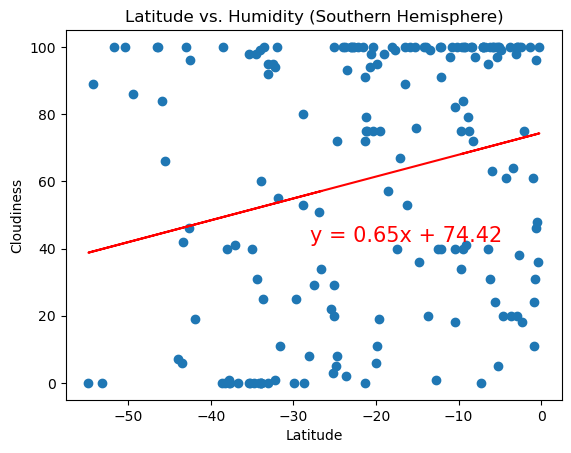

In [160]:
# Southern Hemisphere
y_sc = southern_hemi_df['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_sl, y_sc)
regress_sc = x_sl * slope + intercept
line_eq_sc = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_sl,y_sc)
plt.plot(x_sl,regress_sc,"r-")
plt.annotate(line_eq_sc, (-28,42),fontsize=15,color="red")
plt.title("Latitude vs. Humidity (Southern Hemisphere)")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
print(f"The r-value is: {rvalue**2}")
plt.show()

**Discussion about the linear relationship:** # In Southern Hemisphere,cloudiness is also positively correlated to the latitude; that is, the more latitude, more cloudy. And the correlation is larger in comparison with the northern hemisphere.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.01493726316432255


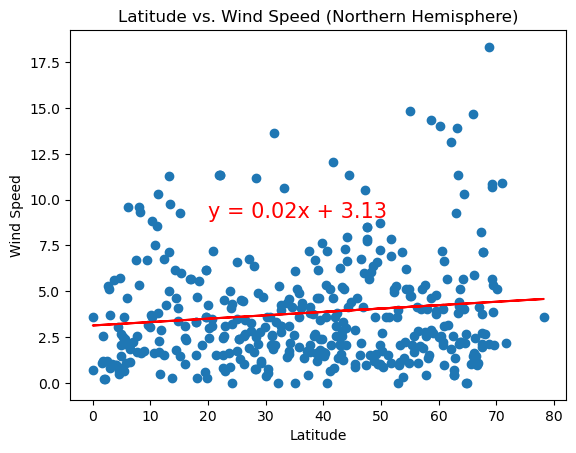

In [163]:
# Northern Hemisphere
y_nw = northern_hemi_df['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y_nw)
regress_nw = x * slope + intercept
line_eq_nw = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x,y_nw)
plt.plot(x,regress_nw,"r-")
plt.annotate(line_eq_nw, (20,9),fontsize=15,color="red")
plt.title("Latitude vs. Wind Speed (Northern Hemisphere)")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
print(f"The r-value is: {rvalue**2}")
plt.show()

**Discussion about the linear relationship:** In Northern Hemisphere, wind speed is positively correlated with the latitude; that is, the more latitude, the faster the wind speed. The correlation, however, is small.

The r-value is: 0.054752226128097194


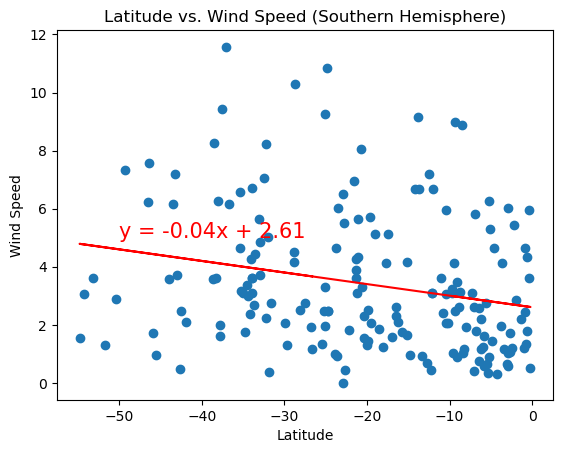

In [167]:
# Southern Hemisphere
y_sw = southern_hemi_df['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_sl, y_sw)
regress_sw = x_sl * slope + intercept
line_eq_sw = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_sl,y_sw)
plt.plot(x_sl,regress_sw,"r-")
plt.annotate(line_eq_sw, (-50,5),fontsize=15,color="red")
plt.title("Latitude vs. Wind Speed (Southern Hemisphere)")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
print(f"The r-value is: {rvalue**2}")
plt.show()

**Discussion about the linear relationship:** In Southern Hemisphere, wind speed is negatively correlated with the latitude; that is, the more latitude, the slower the wind speed. The correlation, however, is also small althoug slightly larger in comparison with Northern Hemisphere.